# **************** Tictactrip Analyses  ****************

In [74]:
# Libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, r2_score 
from sklearn import metrics #Import scikit-learn metrics module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns


### Introduction

Pour cette analyse, j'ai j'ai commencée avec la structuration d'une base unique de données. Pour ça, j'ai fait  la concaténation de bases de données à partir des variables clés décrites sur le document 'Exo'. Ensuite, j'ai créé classes des variables, par exemple, la classe de distance entre villes et de prix.
Une analyse visuelle des variables importants est aussi présente pour biencomprendre la disposition des données.
Enfin, un modèle est proposé pour prédire le prix de tickets en utilisant Tree Decision et K-Neighbors algorithme.


J'espère que vous allez bien apprécier . 

Let's start !! :) 

### Import dataset

In [75]:
ticket= pd.read_csv(r'data\ticket_data.csv' , delimiter=','  )
cities= pd.read_csv(r'data\cities.csv' , delimiter=','  )
providers= pd.read_csv(r'data\providers.csv' , delimiter=','  )
#stations= pd.read_csv(r'data\stations.csv' , delimiter=',' )

### get further details of the data type 

In [76]:
ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [77]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB


In [78]:
providers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB


In [79]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB


In [80]:
#verify missing values
ticket.isnull().sum()

id                     0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
dtype: int64

In [81]:
stations.isnull().sum()

id             0
unique_name    0
latitude       0
longitude      0
dtype: int64

### Joing data sets ticket, cities, station and provider 

merge: ticket and cities

In [82]:
ticket = pd.merge(ticket, cities, how="left", left_on="o_city" , right_on = "id")
ticket.rename({'id_x':'id','unique_name': 'o_city_name', 'local_name': 'o_local_name','latitude': 'o_city_latitude','longitude': 'o_city_longitude' }, axis=1, inplace=True)
ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,id_y,o_local_name,o_city_name,o_city_latitude,o_city_longitude,population
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0


In [83]:
ticket = pd.merge(ticket, cities, how="left", left_on="d_city" , right_on = "id")
ticket.rename({'id_x':'id','unique_name': 'd_city_name', 'local_name': 'd_local_name','latitude': 'd_city_latitude','longitude': 'd_city_longitude' }, axis=1, inplace=True)
ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,id_y,o_local_name,o_city_name,o_city_latitude,o_city_longitude,population_x,id_y,d_local_name,d_city_name,d_city_latitude,d_city_longitude,population_y
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0


merge: ticket and stations

In [84]:
ticket = pd.merge(ticket, stations, how="left", left_on="o_station" , right_on = "id")
ticket.rename({'id_x':'id','unique_name': 'o_station_name','latitude': 'o_station_latitude','longitude': 'o_station_longitude' }, axis=1, inplace=True)
ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,id_y,o_local_name,o_city_name,o_city_latitude,o_city_longitude,population_x,id_y,d_local_name,d_city_name,d_city_latitude,d_city_longitude,population_y,id_y,o_station_name,o_station_latitude,o_station_longitude
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,NaN,NaN,NaN,NaN
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,63.0,Avenue Georges Pompidou,47.896911,1.854277
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740


In [85]:
ticket = pd.merge(ticket, stations, how="left", left_on="d_station" , right_on = "id")
ticket.rename({'id_x':'id','unique_name': 'd_station_name','latitude': 'd_station_latitude','longitude': 'd_station_longitude' }, axis=1, inplace=True)
ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,id_y,o_local_name,o_city_name,o_city_latitude,o_city_longitude,population_x,id_y,d_local_name,d_city_name,d_city_latitude,d_city_longitude,population_y,id_y,o_station_name,o_station_latitude,o_station_longitude,id_y,d_station_name,d_station_latitude,d_station_longitude
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,63.0,Avenue Georges Pompidou,47.896911,1.854277,1044.0,Station Les Sabines,43.583932,3.860233
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,6495.0,Montpellier,43.604900,3.880500
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,6495.0,Montpellier,43.604900,3.880500
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,6495.0,Montpellier,43.604900,3.880500


merge: ticket and providers

In [86]:
ticket_1 = pd.merge(ticket, providers, how="left", left_on="company" , right_on = "id")
ticket_1.rename({'name':'provider_name' }, axis=1, inplace=True)
pd.set_option('display.max_columns', None)
ticket_1

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,id_y,o_local_name,o_city_name,o_city_latitude,o_city_longitude,population_x,id_y,d_local_name,d_city_name,d_city_latitude,d_city_longitude,population_y,id_y,o_station_name,o_station_latitude,o_station_longitude,id_y,d_station_name,d_station_latitude,d_station_longitude,id_y,company_id,provider_id,provider_name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,63.0,Avenue Georges Pompidou,47.896911,1.854277,1044.0,Station Les Sabines,43.583932,3.860233,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,6495.0,Montpellier,43.604900,3.880500,8377,10,2,corailintercite,Intercités,False,False,True,False,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,6495.0,Montpellier,43.604900,3.880500,8377,10,2,corailintercite,Intercités,False,False,True,False,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.906270,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,6495.0,Montpellier,43.604900,3.880500,8381,10,6,coraillunea,Intercités de Nuit,False,False,True,False,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,628,"Paris, Île-de-France, France",paris,48.847702,2.352311,NaN,562,"Nantes, Pays-de-la-Loire, France",nantes,47.248785,-1.520898,298029.0,279.0,Gare de Bercy,48.838424,2.382411,10729.0,Nantes Halluchère - Route de Paris,47.212922,-1.551565,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,628,"Paris, Île-de-France, France",paris,48.847702,2.352311,NaN,562,"Nantes, Pays-de-la-Loire, France",nantes,47.248785,-1.520898,298029.0,279.0,Gare de Bercy,48.838424,2.382411,304.0,Gare de Haluchère-Batignolles,47.248785,-1.520898,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,628,"Paris, Île-de-France, France",paris,48.847702,2.352311,NaN,562,"Nantes, Pays-de-la-Loire, France",nantes,47.248785,-1.520898,298029.0,10642.0,Gare Routière Internationale de Paris-Gallieni...,48.865601

In [87]:
ticket_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  74168 non-null  int64  
 1   company               74168 non-null  int64  
 2   o_station             32727 non-null  float64
 3   d_station             32727 non-null  float64
 4   departure_ts          74168 non-null  object 
 5   arrival_ts            74168 non-null  object 
 6   price_in_cents        74168 non-null  int64  
 7   search_ts             74168 non-null  object 
 8   middle_stations       32727 non-null  object 
 9   other_companies       32727 non-null  object 
 10  o_city                74168 non-null  int64  
 11  d_city                74168 non-null  int64  
 12  id_y                  74168 non-null  int64  
 13  o_local_name          74168 non-null  object 
 14  o_city_name           74168 non-null  object 
 15  o_city_latitude    

In [88]:
#check  duplicate data
duplicate= ticket_1.duplicated()
print(duplicate.sum())

0


### Creating new variables 

In [89]:
#replacing datas from string to datetime format
#creating ticket price in euros

from datetime import datetime
ticket_1['departure_ts']= pd.to_datetime(ticket_1['departure_ts'])
ticket_1['arrival_ts']= pd.to_datetime(ticket_1['arrival_ts'])
ticket_1['search_ts']= pd.to_datetime(ticket_1['search_ts'])

ticket_1['price_in_euros']=ticket_1['price_in_cents']/100
ticket_1.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,id_y,o_local_name,o_city_name,o_city_latitude,o_city_longitude,population_x,id_y,d_local_name,d_city_name,d_city_latitude,d_city_longitude,population_y,id_y,o_station_name,o_station_latitude,o_station_longitude,id_y,d_station_name,d_station_latitude,d_station_longitude,id_y,company_id,provider_id,provider_name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,price_in_euros
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling,45.5
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,63.0,Avenue Georges Pompidou,47.896911,1.854277,1044.0,Station Les Sabines,43.583932,3.860233,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus,14.5
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,6495.0,Montpellier,43.604900,3.880500,8377,10,2,corailintercite,Intercités,False,False,True,False,train,74.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,6495.0,Montpellier,43.604900,3.880500,8377,10,2,corailintercite,Intercités,False,False,True,False,train,135.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542,611,"Orléans, Centre-Val de Loire, France",orleans,47.907018,1.90627,114977.0,542,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,5905.0,Les Aubrais,47.926740,1.906740,6495.0,Montpellier,43.604900,3.880500,8381,10,6,coraillunea,Intercités de Nuit,False,False,True,False,train,77.1


In [90]:
# creating trip duration
ticket_1['trip_duration']= ticket_1['departure_ts'] - ticket_1['arrival_ts']
ticket_1['trip_duration']= (ticket_1['trip_duration']/np.timedelta64(1,'h'))*(-1)

Distance: calculate the haversine distance between origin and destination city  

In [91]:
# creating cities distance 

import numpy as np

def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [92]:
ticket_1['cities_distance'] = haversine_vectorize(ticket_1['o_city_longitude'],ticket_1['o_city_latitude'],ticket_1['d_city_longitude'],ticket_1['d_city_latitude'])

####  Prix min, moyen et max et durée min/max/moyenne par trajet


In [93]:
# prix min, moyen et max et durée min/max/moyenne par trajet
ticket_1[['price_in_euros','trip_duration','cities_distance']].describe()

,price_in_euros,trip_duration,cities_distance
count,74168.000000,74168.000000,74168.000000
mean,43.827111,7.077013,362.810249
std,37.393254,9.916356,194.808228
min,3.000000,0.333333,18.901367
25%,19.000000,3.000000,205.713353
50%,33.500000,4.833333,338.107722
75%,52.500000,8.000000,480.112194
max,385.500000,492.850000,1868.997843


In [94]:
# creating class for price

ticket_1['price_class'] = pd.cut(ticket_1['price_in_euros'], bins=[0,30, 50,70, 100, 101], include_lowest=True, 
                                 labels=['0-30', '31-50', '51-70', '71-100', '101+'])

In [95]:
# creating a class trip duration
ticket_1['trip_duration_class'] = pd.cut(ticket_1['trip_duration'], bins=[0,15, 20,30, 50,51], include_lowest=True, 
                                 labels=['0-15h','16-20h', '21-30h', '31-50h', '51h'])


In [96]:
# creating a class for distance cities :0-200km, 201-800km, 800-2000km, 2000+km
ticket_1['cities_dist_class'] = pd.cut(ticket_1['cities_distance'], bins=[0,200, 500,800, 1000, 2000,2001], include_lowest=True, 
                                 labels=['0-200km', '201-500km', '501-800km', '801-1000km', '1001-2000km', '2001+km'])


In [97]:
# selecting only the important variables to analyse.

In [214]:
ticktactrips=ticket_1[[

    'id_x',
    'departure_ts',
    'arrival_ts',
    'search_ts',
    'trip_duration',
    'trip_duration_class',
    'price_in_euros',
    'price_class',
    'cities_distance',
    'cities_dist_class',
    'transport_type',
    
    
    #cities
    'o_city',
    'd_city',
    'o_city_name',
    'd_city_name',
    'o_city_latitude',
    'o_city_longitude',
    'd_city_latitude',
    'd_city_longitude', 
    
    #station
    'o_station_name',
    'o_station_latitude',
    'o_station_longitude',
    'd_station_name',
    'd_station_latitude',
    'd_station_longitude',
    
    #provider
    'company',
    'provider_name']]
    

In [216]:
# new variables

ticktactrips['weekday_departure'] = ticktactrips['departure_ts'].dt.day_name()
ticktactrips['weekday_arrival'] = ticktactrips['arrival_ts'].dt.day_name()
ticktactrips['weekday_search'] = ticktactrips['search_ts'].dt.day_name()
ticktactrips['route']=  ticktactrips['o_city_name'] + '->' + ticktactrips['d_city_name'] 

ticktactrips.head()

<ipython-input-216-018967015d2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticktactrips['weekday_departure'] = ticktactrips['departure_ts'].dt.day_name()
<ipython-input-216-018967015d2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticktactrips['weekday_arrival'] = ticktactrips['arrival_ts'].dt.day_name()
<ipython-input-216-018967015d2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,id_x,departure_ts,arrival_ts,search_ts,trip_duration,trip_duration_class,price_in_euros,price_class,cities_distance,cities_dist_class,transport_type,o_city,d_city,o_city_name,d_city_name,o_city_latitude,o_city_longitude,d_city_latitude,d_city_longitude,o_station_name,o_station_latitude,o_station_longitude,d_station_name,d_station_latitude,d_station_longitude,company,provider_name,weekday_departure,weekday_arrival,weekday_search,route
0,6795025,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,2017-10-01 00:13:31.327000+00:00,6.166667,0-15h,45.5,31-50,502.881237,501-800km,carpooling,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,NaN,NaN,NaN,NaN,NaN,NaN,8385,bbc,Friday,Friday,Sunday,orleans->montpellier
1,6795026,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,2017-10-01 00:13:35.773000+00:00,17.833333,16-20h,14.5,0-30,502.881237,501-800km,bus,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,Avenue Georges Pompidou,47.896911,1.854277,Station Les Sabines,43.583932,3.860233,9,ouibus,Friday,Saturday,Sunday,orleans->montpellier
2,6795027,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,2017-10-01 00:13:40.212000+00:00,31.950000,31-50h,74.0,71-100,502.881237,501-800km,train,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,Les Aubrais,47.926740,1.906740,Montpellier,43.604900,3.880500,8377,corailintercite,Friday,Saturday,Sunday,orleans->montpellier
3,6795028,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,2017-10-01 00:13:40.213000+00:00,21.583333,21-30h,135.0,NaN,502.881237,501-800km,train,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,Les Aubrais,47.926740,1.906740,Montpellier,43.604900,3.880500,8377,corailintercite,Friday,Saturday,Sunday,orleans->montpellier
4,6795029,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,2017-10-01 00:13:40.213000+00:00,21.766667,21-30h,77.1,71-100,502.881237,501-800km,train,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,Les Aubrais,47.926740,1.906740,Montpellier,43.604900,3.880500,8381,coraillunea,Friday,Saturday,Sunday,orleans->montpellier


### Descriptive analyses 

Mean of price, trip and distance

In [284]:
# prix min, moyen et max et durée min/max/moyenne par trajet
ticktactrips[['price_in_euros','trip_duration','cities_distance']].describe()

,price_in_euros,trip_duration,cities_distance
count,74168.000000,74168.000000,74168.000000
mean,43.536458,6.623396,362.312979
std,37.376983,9.919790,194.835640
min,3.000000,0.000000,18.000000
25%,19.000000,3.000000,205.000000
50%,33.000000,4.000000,338.000000
75%,52.000000,8.000000,480.000000
max,385.000000,492.000000,1868.000000


The describe method shows basic statistical characteristics of each numerical feature.
For price we can see that the minimun is 3, the mean 44 and the maximum is 385.5.
For trip duration time the minimun is 30 minuts, the mean 7 hours and the maximum is 492 hours.

### Visualisation 

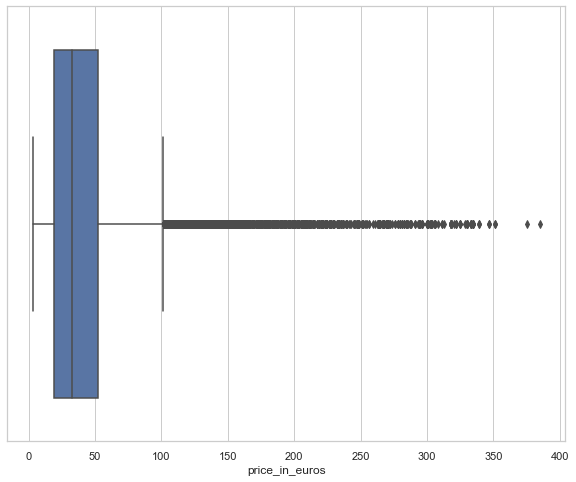

In [287]:
# price_in_euros :
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='price_in_euros', data=ticktactrips)

75 % of the data set has ticket price less than 52 euros. 

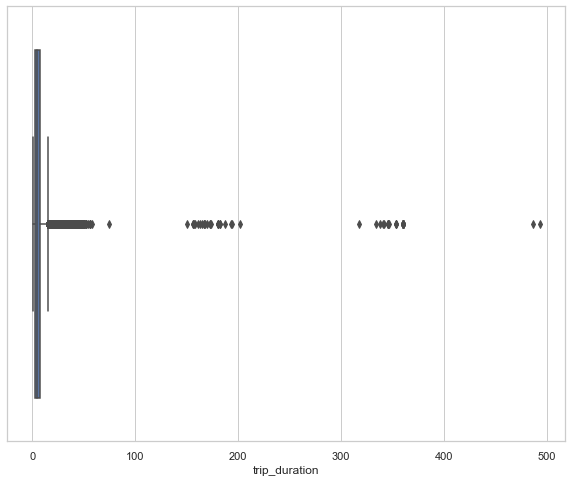

In [218]:
# trip_duration :
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='trip_duration', data=ticktactrips)

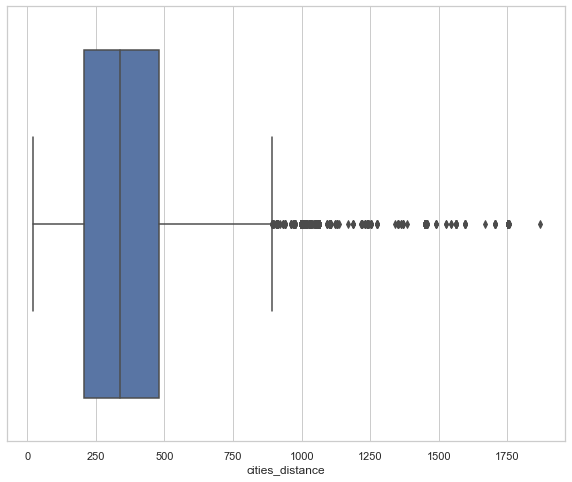

In [219]:
# cities_distance :
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='cities_distance', data=ticktactrips)

With this information we can see that the prices are skewed right and some outliers lies above > 100 euros . We will eventually want to get rid of the them to get a normal distribution in a eventual machine learning model implementation.

### Bivariate analyses

In [220]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

<AxesSubplot:xlabel='price_in_euros', ylabel='trip_duration'>

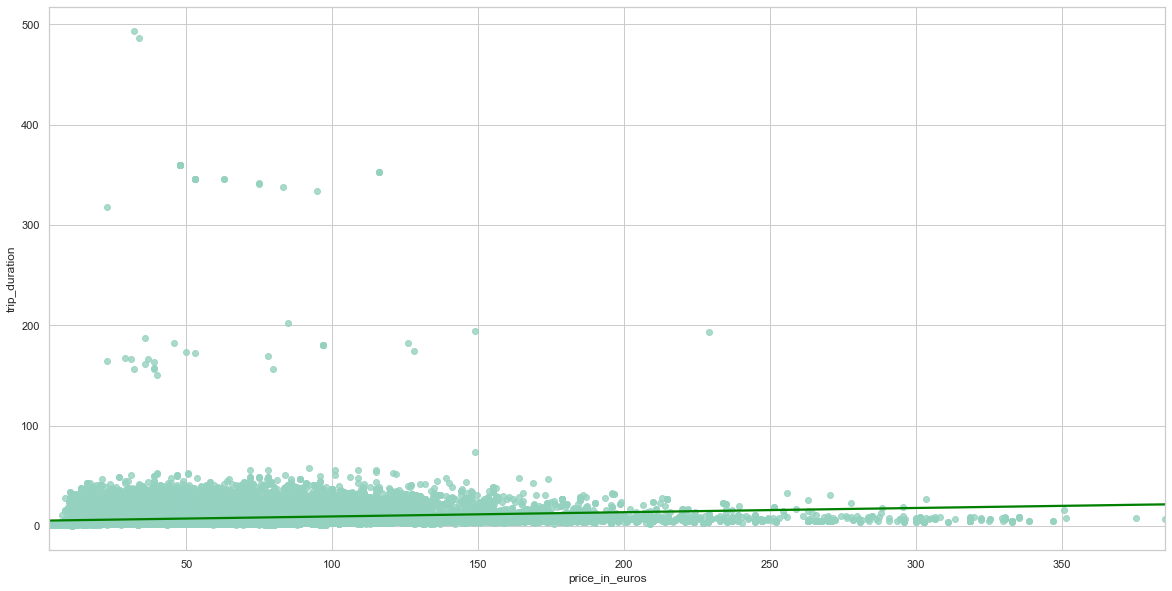

In [221]:
plt.figure(figsize=(20,10))
sns.regplot(x="price_in_euros",y="trip_duration", data=ticktactrips, line_kws={"color": "green"})

We can see that a big quantity of the data is concentrated in the right side, whit small prices and small trip duration.

<AxesSubplot:xlabel='price_in_euros', ylabel='cities_distance'>

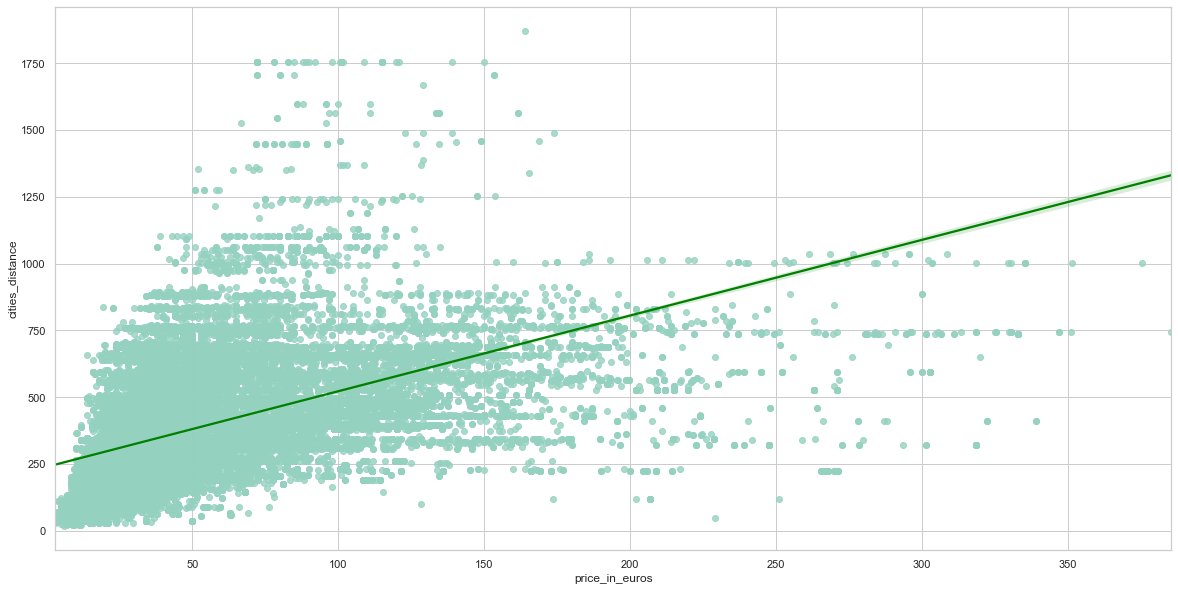

In [222]:
plt.figure(figsize=(20,10))
sns.regplot(x="price_in_euros",y="cities_distance", data=ticktactrips,  line_kws={"color": "green"})

We can see that a big quantity of the data is concentrated in the right side, whit small prices and small cities distance


### Distribution of categorical variables


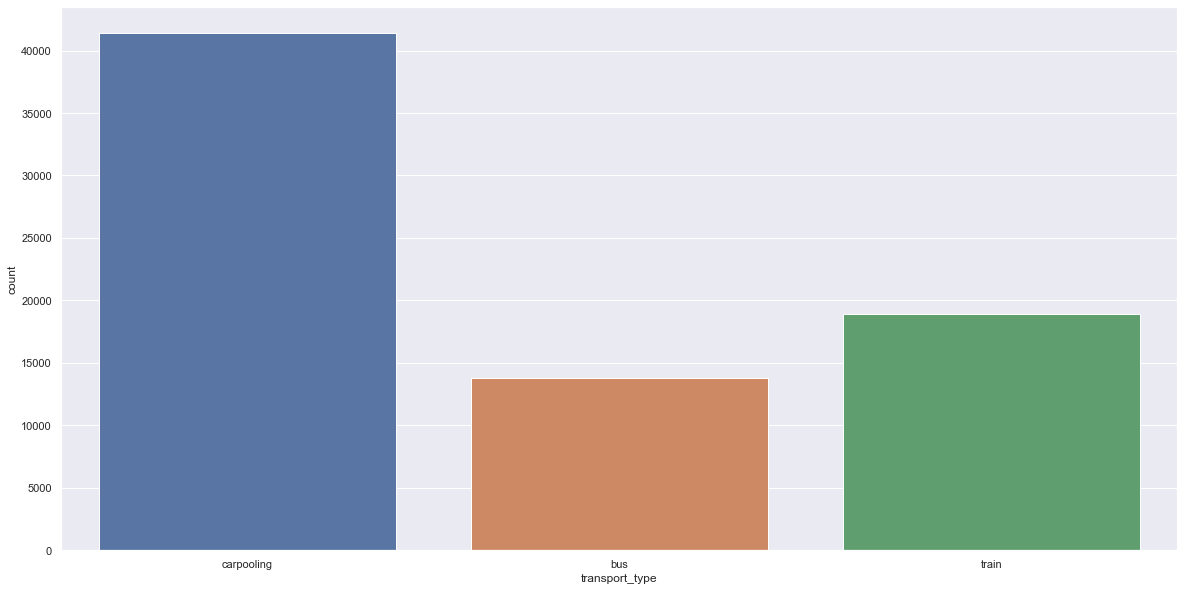

In [223]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='transport_type', data=ticktactrips)

The majority of the tickets in the data set is for "carpooling" trips.

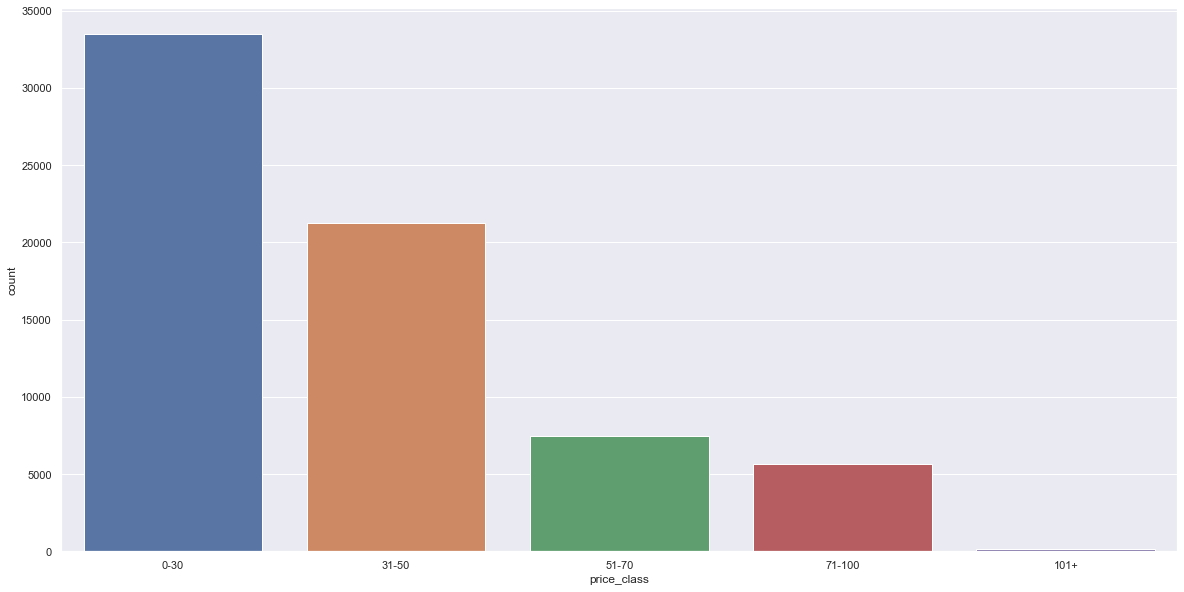

In [224]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='price_class', data=ticktactrips)

The majority of the tickets in the data set is for ticket price smaller than 30 euros.


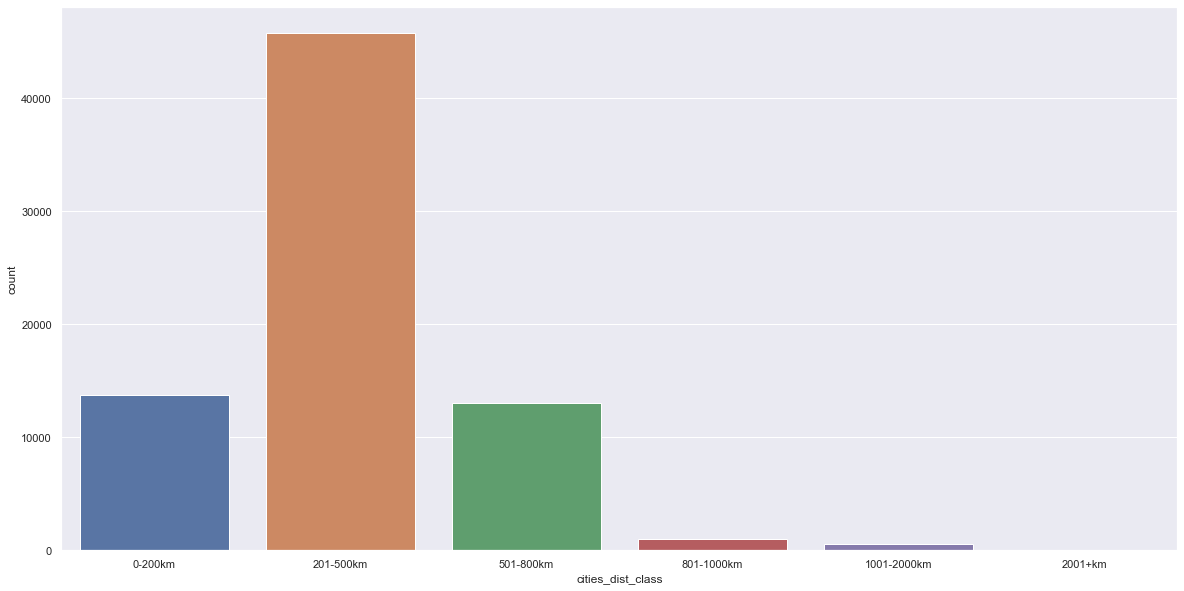

In [225]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='cities_dist_class', data=ticktactrips)

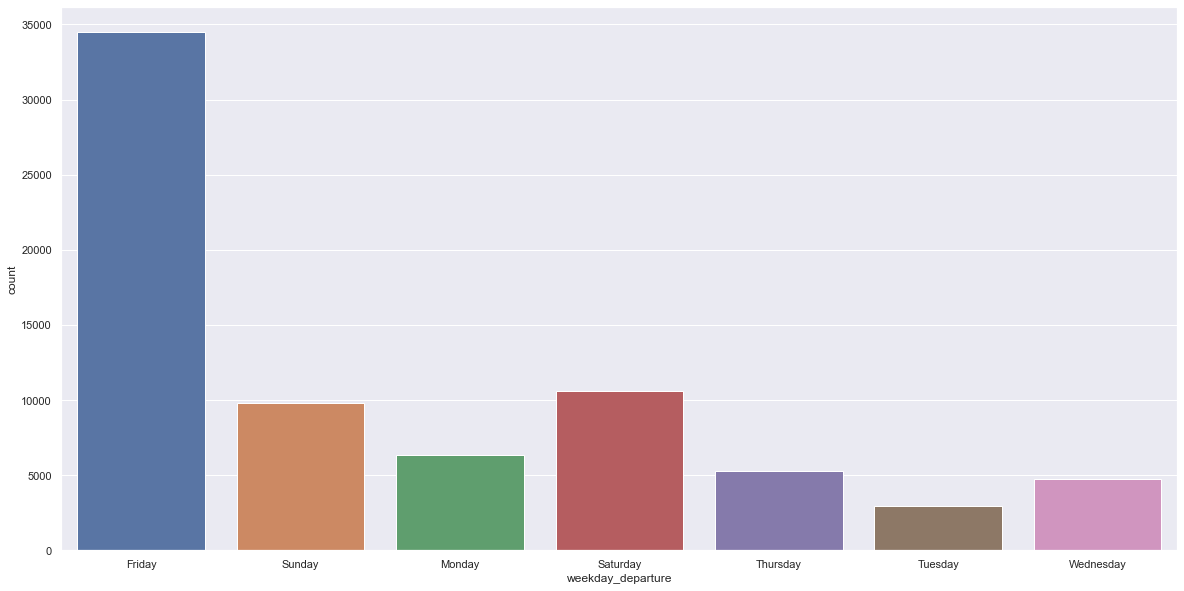

In [226]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='weekday_departure', data=ticktactrips)

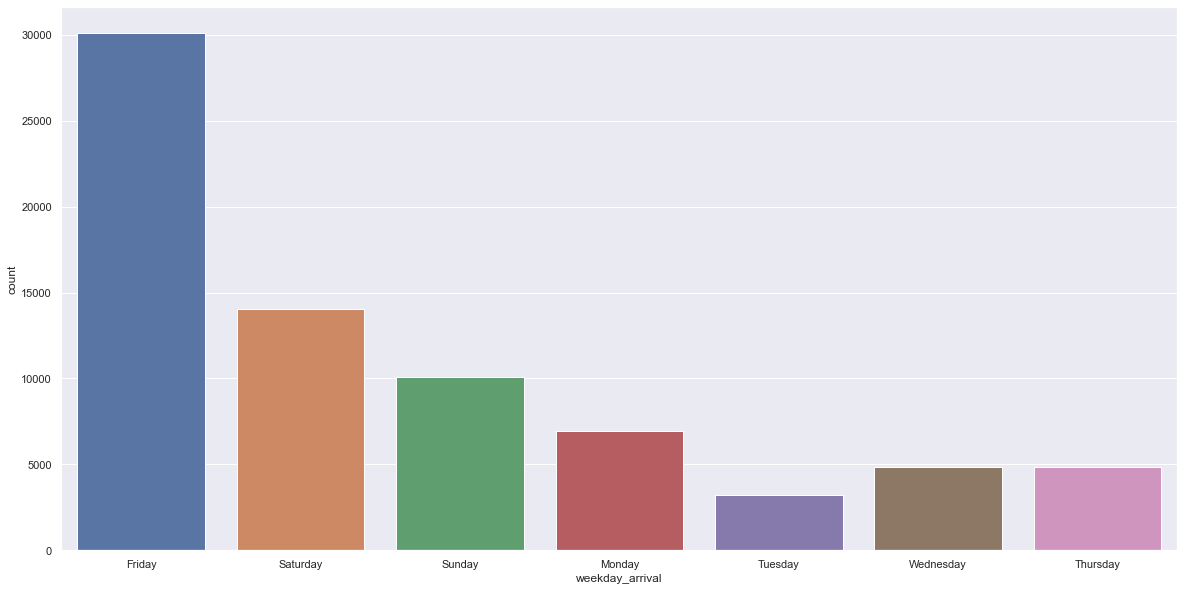

In [227]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='weekday_arrival', data=ticktactrips)

Friday is the day with the most quantitie of tickets. 

###  Barplot describing the relation between price and other variables 

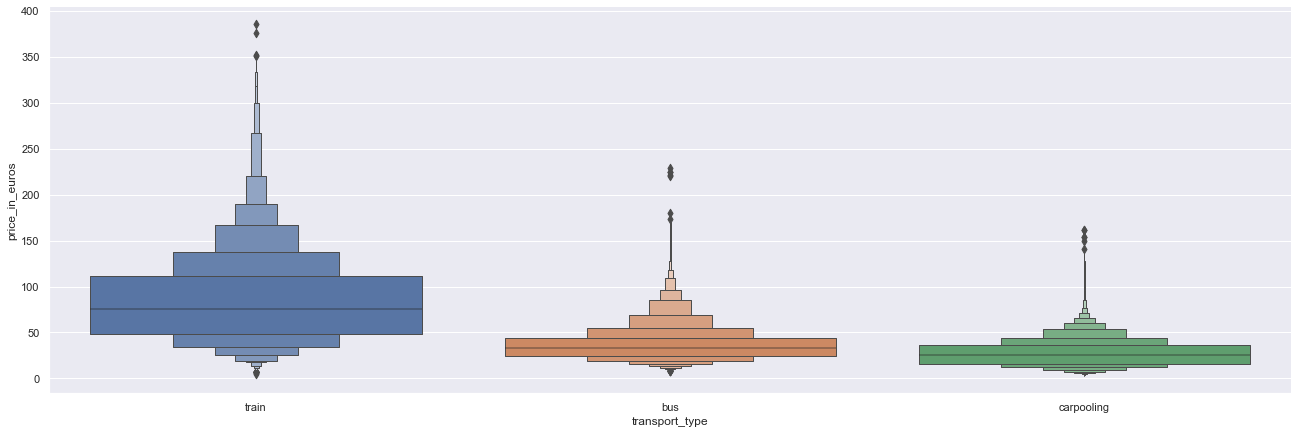

In [228]:

sns.catplot(y = "price_in_euros", x = "transport_type", data = ticktactrips.sort_values("price_in_euros", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()



We can see that for carpooling trips the clients pay around 25 euros for trip.
On the othe hand, for bus trips clients pay around 30 euros for trip.
Also, for train trips, clients pay around 70 euros.




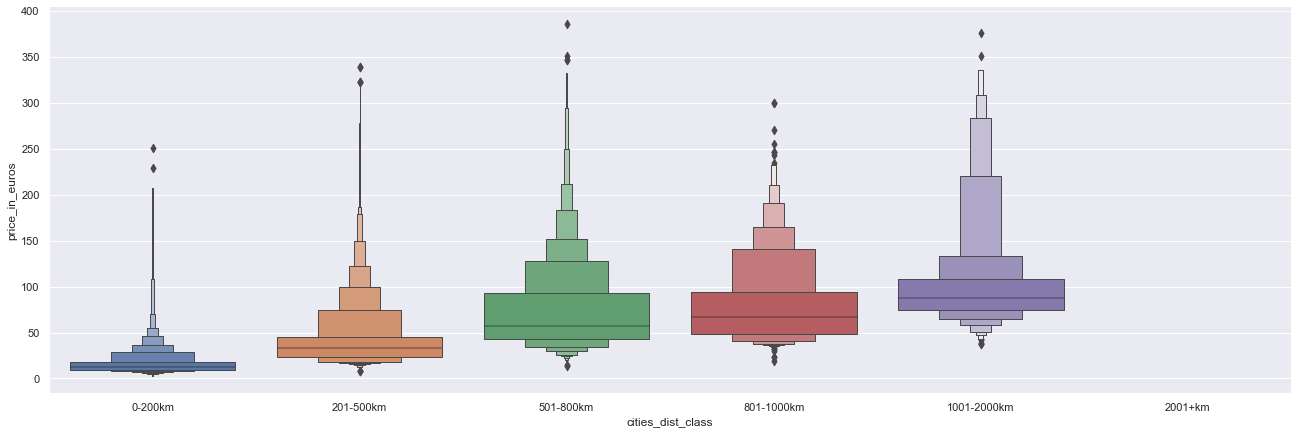

In [229]:


sns.catplot(y = "price_in_euros", x = "cities_dist_class", data = ticktactrips.sort_values("price_in_euros", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()




When we analyse "trip duration versus price" we see that for short distance trips clients pay, in general,20 euros.
On the other hands, for long distance trips they are open to pay around 70 euros.


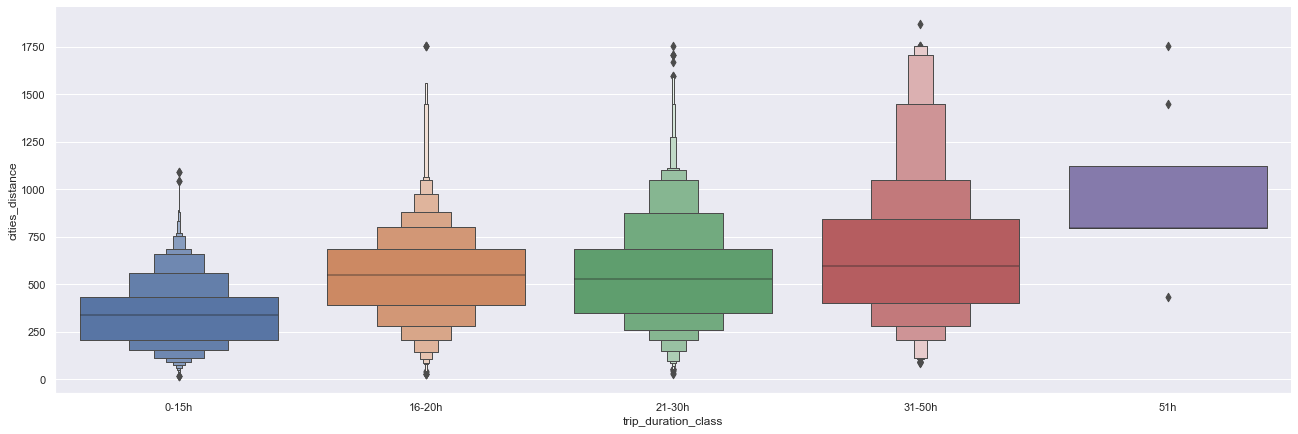

In [230]:

sns.catplot(y = "cities_distance", x = "trip_duration_class", data = ticktactrips.sort_values("price_in_euros", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


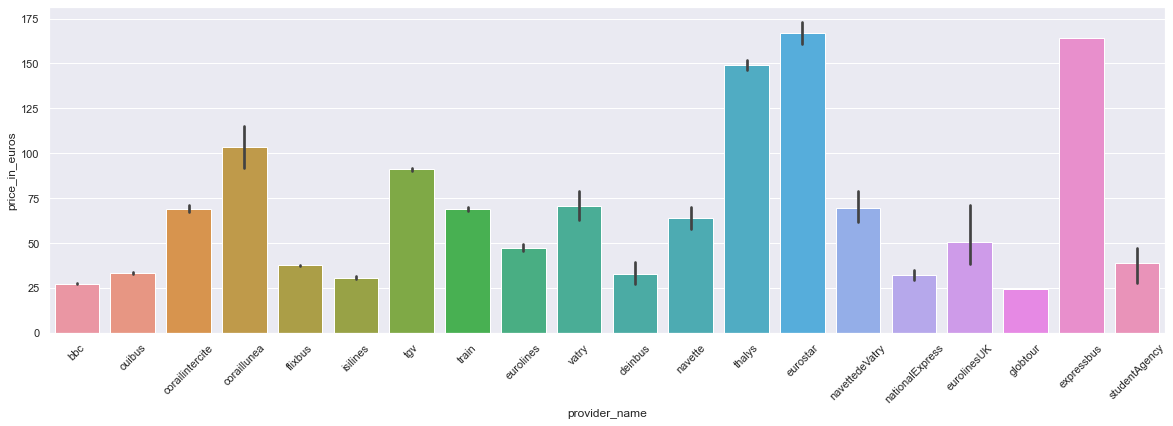

In [115]:
# provider x price 
plt.figure(figsize=(20, 6))
sns.barplot(data=ticktactrips, x = 'provider_name', y='price_in_euros')
plt.xticks(rotation=45)
plt.show()

We can see that the most expensive providers are thalys, eurostar and expressbus.

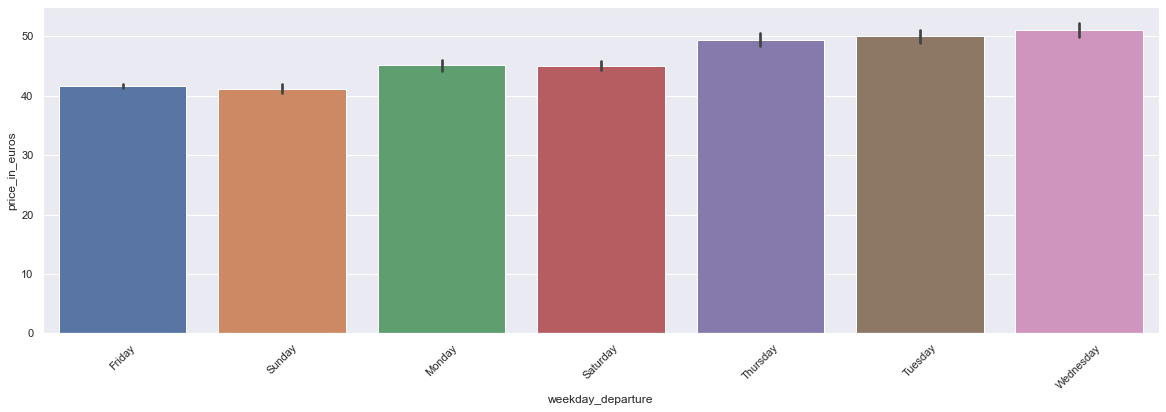

In [116]:
#week day x price
plt.figure(figsize=(20, 6))
sns.barplot(data=ticktactrips, x = 'weekday_departure', y='price_in_euros')
plt.xticks(rotation=45)
plt.show()
 

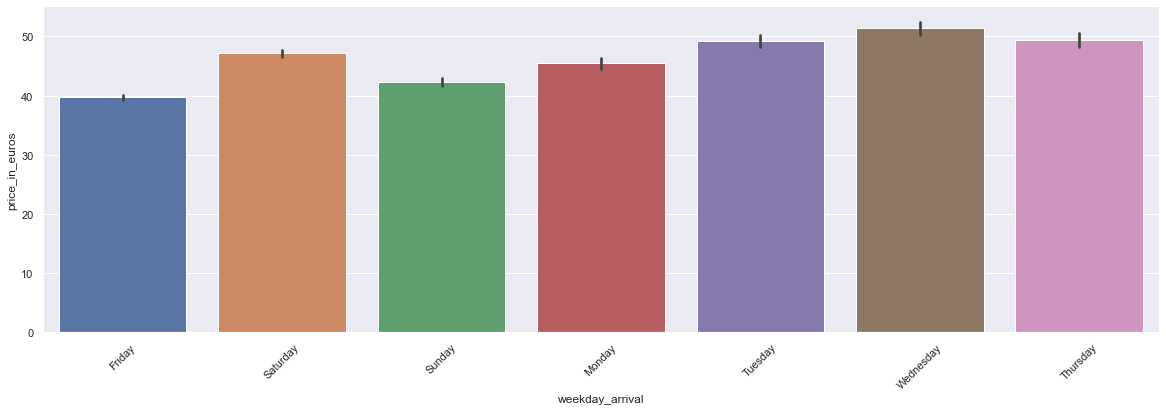

In [117]:
plt.figure(figsize=(20, 6))
sns.barplot(data=ticktactrips, x = 'weekday_arrival', y='price_in_euros')
plt.xticks(rotation=45)
plt.show()


Thursday, Tuesday and Wednesday  are the most expensive ticket days to departures and arrival.  

### Correlation between variables 

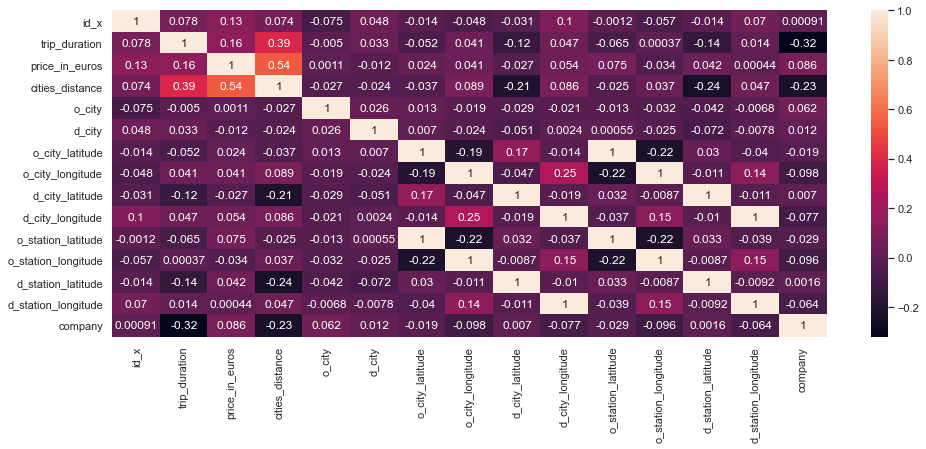

In [231]:
plt.figure(figsize=(16, 6))
sns.heatmap(ticktactrips.corr(), annot=True)
plt.show()

We don't see to much correlation between the variables. One of the biggest one is between price and cities distances.

###  Training and Testing Data

Let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "price" column. First of all, we will encode some categorical variables that we will use in the model.


In [232]:
# enconding some variables:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
 

ticktactrips['weekday_departure'] = le.fit_transform(ticktactrips['weekday_departure'])
ticktactrips['weekday_arrival'] = le.fit_transform(ticktactrips['weekday_arrival'])
ticktactrips['search_ts'] = le.fit_transform(ticktactrips['search_ts'])
ticktactrips['provider_name'] = le.fit_transform(ticktactrips['provider_name'])
# ticktactrips['transport_type'] = le.fit_transform(ticktactrips['transport_type'])
ticktactrips['route'] = le.fit_transform(ticktactrips['route'])
ticktactrips['price_in_euros']=ticktactrips['price_in_euros'].astype(np.int64)
ticktactrips['cities_distance']=ticktactrips['cities_distance'].astype(np.int64)
ticktactrips['trip_duration']=ticktactrips['trip_duration'].astype(np.int64)



 

<ipython-input-232-fb6502a63ace>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticktactrips['weekday_departure'] = le.fit_transform(ticktactrips['weekday_departure'])
<ipython-input-232-fb6502a63ace>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticktactrips['weekday_arrival'] = le.fit_transform(ticktactrips['weekday_arrival'])
<ipython-input-232-fb6502a63ace>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [233]:
ticktactrips = pd.get_dummies(ticktactrips, columns=['transport_type'])
ticktactrips.head()

,id_x,departure_ts,arrival_ts,search_ts,trip_duration,trip_duration_class,price_in_euros,price_class,cities_distance,cities_dist_class,o_city,d_city,o_city_name,d_city_name,o_city_latitude,o_city_longitude,d_city_latitude,d_city_longitude,o_station_name,o_station_latitude,o_station_longitude,d_station_name,d_station_latitude,d_station_longitude,company,provider_name,weekday_departure,weekday_arrival,weekday_search,route,transport_type_bus,transport_type_carpooling,transport_type_train
0,6795025,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,0,6,0-15h,45,31-50,502,501-800km,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,NaN,NaN,NaN,NaN,NaN,NaN,8385,0,0,0,Sunday,896,0,1,0
1,6795026,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1,17,16-20h,14,0-30,502,501-800km,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,Avenue Georges Pompidou,47.896911,1.854277,Station Les Sabines,43.583932,3.860233,9,14,0,2,Sunday,896,1,0,0
2,6795027,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,2,31,31-50h,74,71-100,502,501-800km,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,Les Aubrais,47.926740,1.906740,Montpellier,43.604900,3.880500,8377,1,0,2,Sunday,896,0,0,1
3,6795028,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,3,21,21-30h,135,NaN,502,501-800km,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,Les Aubrais,47.926740,1.906740,Montpellier,43.604900,3.880500,8377,1,0,2,Sunday,896,0,0,1
4,6795029,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,3,21,21-30h,77,71-100,502,501-800km,611,542,orleans,montpellier,47.907018,1.90627,43.604452,3.918318,Les Aubrais,47.926740,1.906740,Montpellier,43.604900,3.880500,8381,2,0,2,Sunday,896,0,0,1


In [259]:
#separing trai and test data set

train_data = ticktactrips[['cities_distance','trip_duration','transport_type_train','transport_type_carpooling',
                           'transport_type_bus','provider_name','weekday_departure',
                           'weekday_arrival','price_in_euros']]
test_data = ticktactrips[['cities_distance','trip_duration','transport_type_train','transport_type_carpooling',
                           'transport_type_bus','provider_name','weekday_departure',
                           'weekday_arrival']]

In [260]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   cities_distance            74168 non-null  int64
 1   trip_duration              74168 non-null  int64
 2   transport_type_train       74168 non-null  uint8
 3   transport_type_carpooling  74168 non-null  uint8
 4   transport_type_bus         74168 non-null  uint8
 5   provider_name              74168 non-null  int32
 6   weekday_departure          74168 non-null  int32
 7   weekday_arrival            74168 non-null  int32
 8   price_in_euros             74168 non-null  int64
dtypes: int32(3), int64(3), uint8(3)
memory usage: 5.8 MB


In [261]:
array = train_data.values
X = array[:, 0:8]
Y = array[:, 8]

In [262]:
#we will rescale the data using a normalizer

from sklearn.preprocessing import Normalizer

nz = Normalizer()
rescaled_X = nz.fit_transform(X)
test_rescaled_X = nz.transform(test_data)


In [263]:
#split data set
x_train, x_test, y_train, y_test = train_test_split(test_data, Y, test_size=0.20, random_state=1)

### Training the Model

Tree Decision

In [275]:
# tree decision

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Evaluating the Model : Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

Accuracy: 0.38000539301604425
MSE: 184.09249022515843


C:\Users\Dani\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


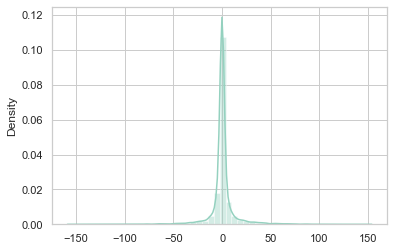

In [211]:
# Residuous: Plot a histogram of the residuals to be sure if it looks normally distributed
sns.distplot(y_test-y_pred)
plt.show()

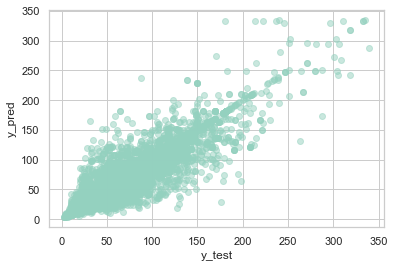

In [212]:
# Create a scatterplot of the real test values versus the predicted values

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [281]:
# K-nearest neighbors classifier (= most common class algorithm)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
print("K-nearest neighbors:{:.2f}%".format(neigh.score(x_test,y_test) * 100))

K-nearest neighbors:30.17%


### Conclusion:



For both  Tree decision and K- NeighborsClassifier we have not very good performance.
For NeighborsClassifierits 30% and for Tree Decision the performance if 38% of accuracy to predict the price of ticket. 
It show that the model doesn't performe well in this dataset and with the selected variables. Maybe it should be better to see if the  variables are well structured for the analysis. 
I tried also to performe the model with only tickets less than 80 euros, with the a propose to remove parte of the 
outliers( I mean, ticket prices far from the 75% of data set representativity).However, even doing it, the performance of the model doens't improve.
There are many factors that may have contributed to this inaccuracy and, maybe, for this analyses it's necessary to try another composition of features to improve the model performance. Maybe I didn't choose features enough correlated to the values we were trying to predict (price). 
Another factor is that  Tree Decision  NeighborsClassifier may not be the best kind of model of the data set analysed. 
 
 
 

Thank you for your attention :) 